In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

In [3]:
def gini_impurity(nb_classes, labels):
    value = 0
    for c in range(nb_classes):
        p = (labels==c).mean()
        value += p * (1-p) # P(y1) * P(y2) == P(y1) * (1 - P(y1))
    return value

def entropy(nb_classes, labels):
    value = 0
    for c in range(nb_classes):
        p = (labels==c).mean()
        if p != 0:
            value += - p * np.log(p)
    return value

def average_gain(f, nb_classes, threshold, data, labels):    
    g0 = f(nb_classes, labels)
    
    split = data < threshold
    if split.mean() == 1 or split.mean() == 0:
        return 0
    
    g1 = f(nb_classes, labels[split])
    g2 = f(nb_classes, labels[~split])
    
    # weighted average
    g1 = split.mean() * g1
    g2 = (~split).mean() * g2
    return g0 - (g1 + g2) / 2

In [4]:
def plot_gini_vs_entropy(nb_classes=3, np_points_per_class=100):
    mu = np.random.rand(nb_classes)
    std = np.random.rand(nb_classes) * 0.3
    
    data = np.zeros(nb_classes * np_points_per_class)
    labels = np.zeros(nb_classes * np_points_per_class)
    for c in range(nb_classes):
        data_i = np.random.normal(mu[c], std[c], size=np_points_per_class)
        data[c*np_points_per_class:(c+1)*np_points_per_class] = data_i
        labels[c*np_points_per_class:(c+1)*np_points_per_class] = c
    
    tx = np.linspace(data.min(), data.max(), num=50)
    tgini = np.zeros_like(tx)
    tentropy = np.zeros_like(tx)
    for i, t in enumerate(tx):
        tgini[i] = average_gain(gini_impurity, nb_classes, t, data, labels)
        tentropy[i] = average_gain(entropy, nb_classes, t, data, labels)
    
    plt.figure(figsize=(15,6))
    ax1 = plt.gca()
    for c in range(nb_classes):
        ax1.hist(data[labels==c], bins=30, alpha=0.7)
    ax2 = ax1.twinx()
    ax2.plot(tx, tgini, 'r-', label='gini')
    ax2.plot(tx, tentropy, 'g-', label='entropy')
    ax2.legend()
    
    plt.axvline(tx[tgini.argmax()], c='r')
    plt.axvline(tx[tentropy.argmax()], c='g')

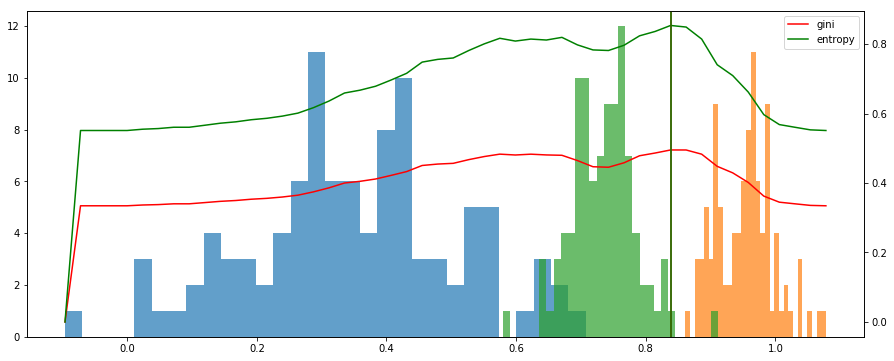

In [5]:
plot_gini_vs_entropy(nb_classes=3)

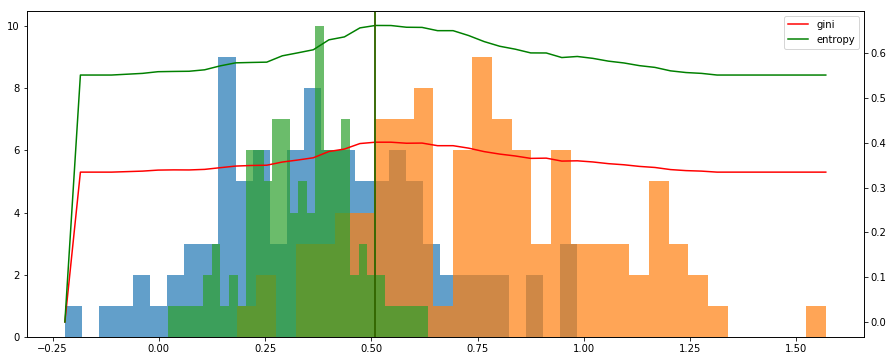

In [6]:
plot_gini_vs_entropy(nb_classes=3)

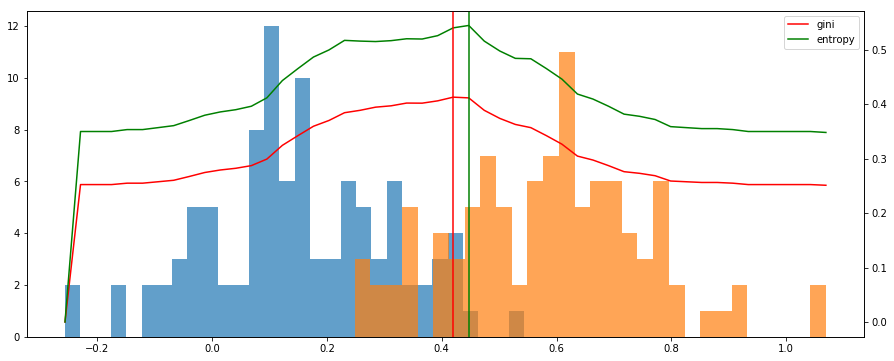

In [7]:
plot_gini_vs_entropy(nb_classes=2)

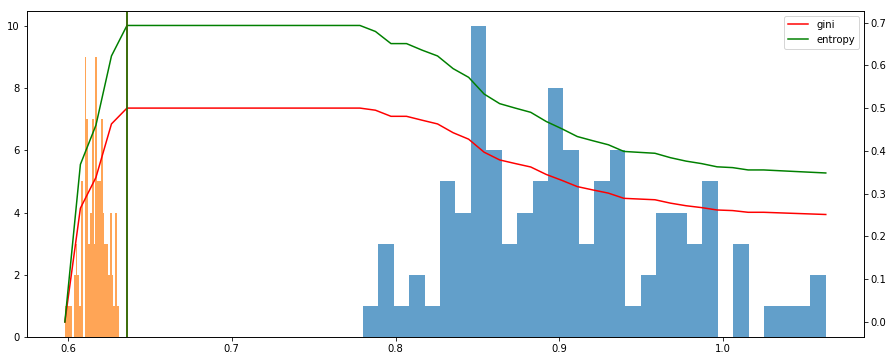

In [8]:
plot_gini_vs_entropy(nb_classes=2)

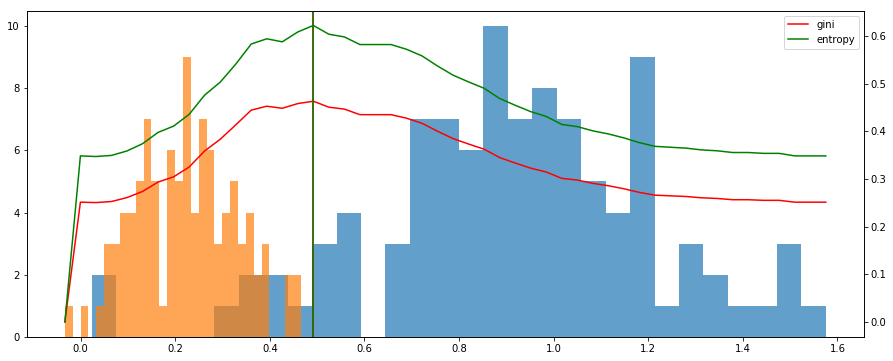

In [9]:
plot_gini_vs_entropy(nb_classes=2)

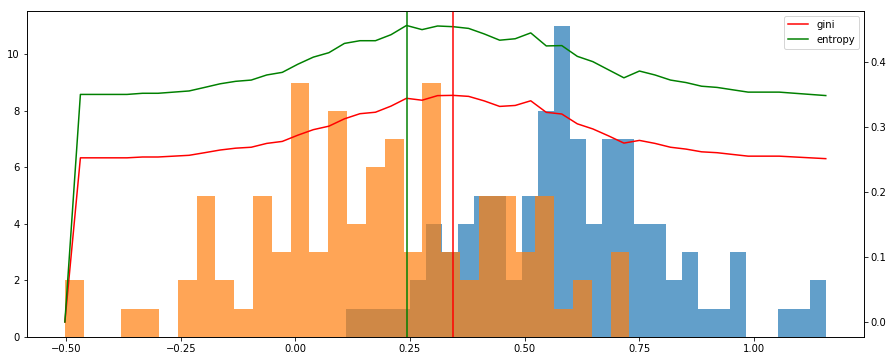

In [10]:
plot_gini_vs_entropy(nb_classes=2)